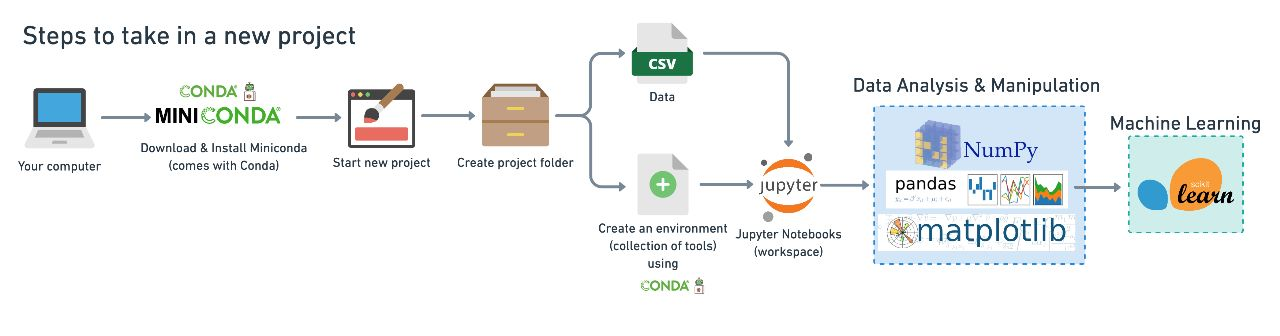

# Project Name : - Heart-Disease-Project 



## Predicting heart disease using machine learning 

This notebook looks Into Using Various Python-Based Machine Learning and Data  Science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical atrributes.

## we're going to take the following apprach:
1. Problem definition 
2. Data 
3. evalutaion
4. Features
5. Modelling 
6.Experimentation

## 1. Problem definiton

> Given clinical Parameter about a Patient, can we predict whether or not they have heart Disease?

## 2. Data

The Original data came from the cleavland data from the UCI Machine Learning Learning Repository 


There is also a version of its aviable on Kaggle.


## 3. Evaluation 

> If we can reach 95% accracy at predicting whether or not a patient has heart disease during the proof of concept, we'll purse the project .

## 4. Features 

This is where you'll get different information about each of the featurein your data.


**Creating Data Dictionary**


* agage in year 
* sex (1 = male; 0=female)
    *
* cp chest pain type 

    * 0:Typical angina: chest pain related decrease blood supply to the heart 
    * 1: Atypical Angina: chest pain not related to heart 
    * 2: Non-anginal Pain: Typically esophageal spasms (non heart related)
    * 3: Aysmptomatic: chest pain not showing signs of disease 
    
* trstbps- resting blood presure ( in mmHg on admission to the hopital) anything above 130-140 is typically cause for concern


* chol- serum cholestoral in mg/dl

    * serum =LDL+HDL +.2* triglcerides
    * above 200 is cause for concern
    
* fbe(fasting blood sugar >120mg/dl)(1= true;0 =false)
    * \>126mg/dl sing diabetes
* restecg- resting  electrocardiographic result heart rate achieved
    * 0:Nothing to note
    * 1:ST_T wave abnormality
        * can range from mild symtoms to severe problems 
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged Heart's Main pumping chamber
        
* thalach- maxium heart rate achieved 
* exangex- ercise include angina(1=yes; 0=no)
* oldpeak- ST depression induced by exercise relative to rest looks at stress of heart stress more
* slope- the slope of the peak exercise ST segment
   
   * 0: Upslping better heart rate with excercise (uncommon>
   * 1:Flatsloping: minimal change (typical healthy heart )
   * 2: Downslopins: signs of unhealth heart 
   
* ca- umber of major vessels (0-3) colored by floursospy
    * colored vessel means the doctor can see the blood passing through
    *  the more blood movement the better (no clots)
    
* thal

    * 3 normal; 
    * 6=fixed defect;used to be dect but ok now
    * 7=reversable defect: no proper blood movement when excercising 
    
* target- have disease or not (1=Yes or 0=No)(= the Predicted attribute)

## Modeling 

## Preparing the tools 

we're going to use pandas , Matplotlib, and numpy for data analysis and manipulation.


In [67]:
# Import all the data we need 

# Regular EDA (exploratory data and analysis) Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we want our plots to appear inside the notebook

%matplotlib inline

import seaborn as sns

#Model from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score # for evaluation 
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # for Tuning Machine Learning Model
from sklearn.metrics import roc_curve, RocCurveDisplay,auc # Plot roc cureve onpy plot using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("Successfully Import module")

Successfully Import module


## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(row, column)

(303, 14)

## data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the you're the working 

1. What Question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

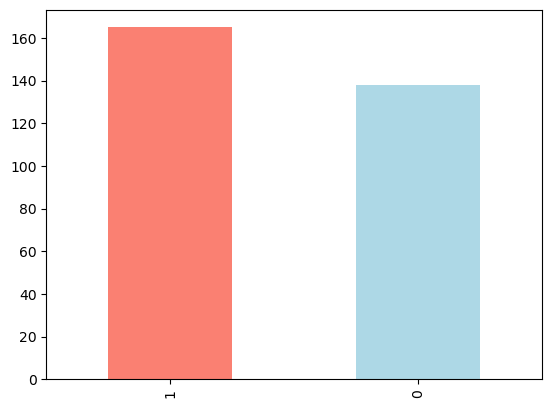

In [6]:
df["target"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### that's function use for check any row doesnot have empyt value 

There two function use that's purpose for that
 
    1. isna()
    2. insull 

for counting use sum()

In [9]:
df.isna().sum(),df.isnull().sum()

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

###  Heart Diseas Frequency according to sex 

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#  Campare target volum with sex colum
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


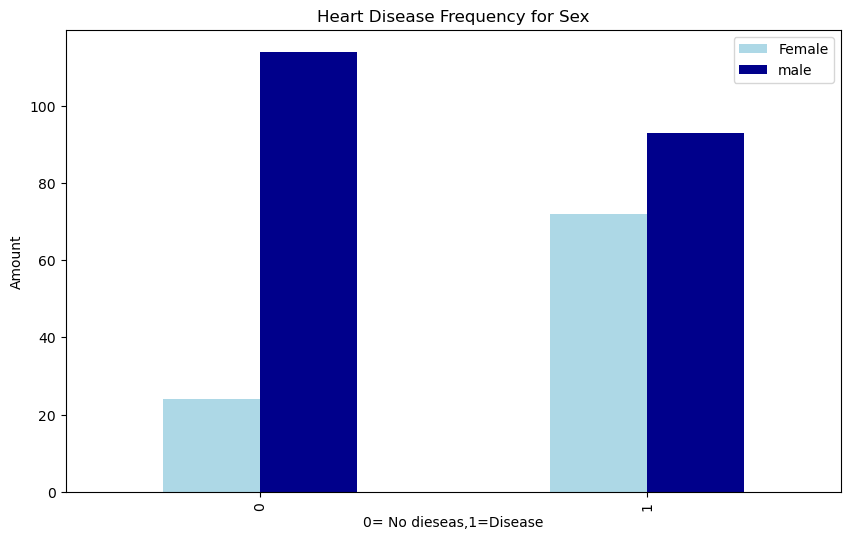

In [12]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=("LightBlue","DarkBlue"));
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No dieseas,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])


### Age vs Max Heart Rate For Heart Disease

Text(0, 0.5, 'Heart Rate ')

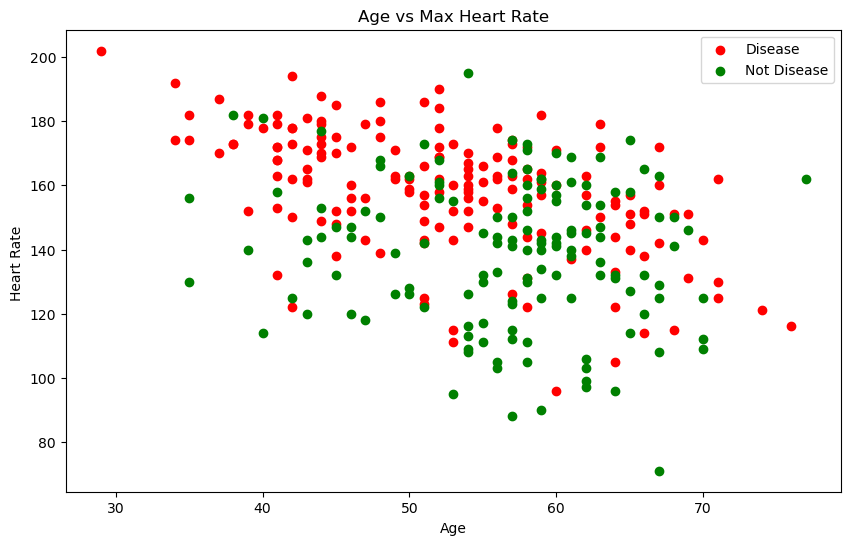

In [13]:
# create antoher figure 
plt.figure (figsize=(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="Red");
# Scatter with negative example
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green")

# add some helpfull info

plt.legend(["Disease" ,"Not Disease"])
plt.title("Age vs Max Heart Rate");
plt.xlabel("Age")
plt.ylabel("Heart Rate ")


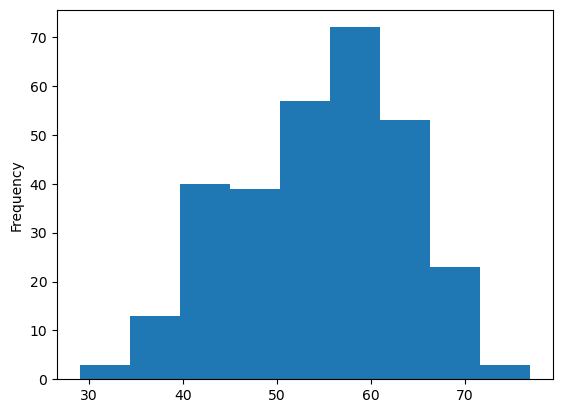

In [14]:
# check the distribution of the age column with a histrogram
df.age.plot.hist(bins=9);

###  Heart Disease Frequency per chest pain Type
chest pain type

    0:Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical Angina: chest pain not related to heart
    2: Non-anginal Pain: Typically esophageal spasms (non heart related)
    3: Aysmptomatic: chest pain not showing signs of disease



In [15]:
# chest pain 
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


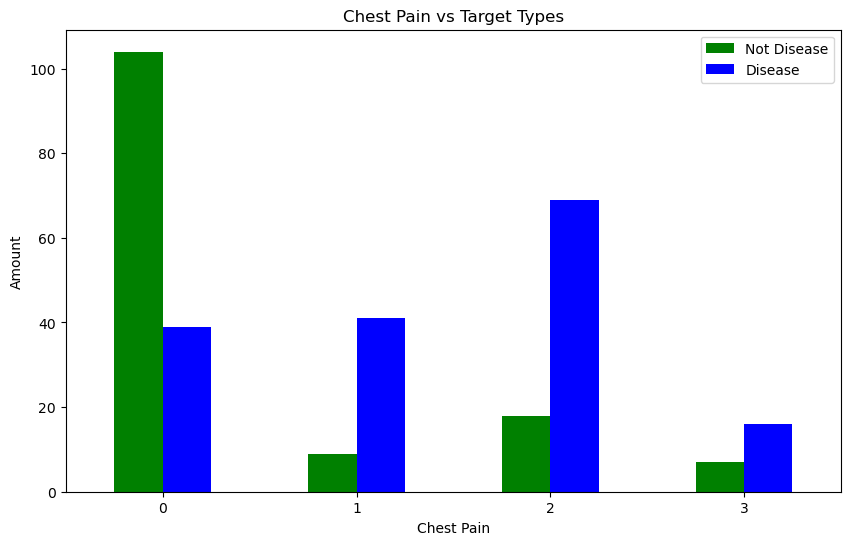

In [17]:
# Make the cross more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["Green","blue"]);
plt.title("Chest Pain vs Target Types")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["Not Disease","Disease"]);
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# make A correlation matix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [20]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

(14.5, -0.5)

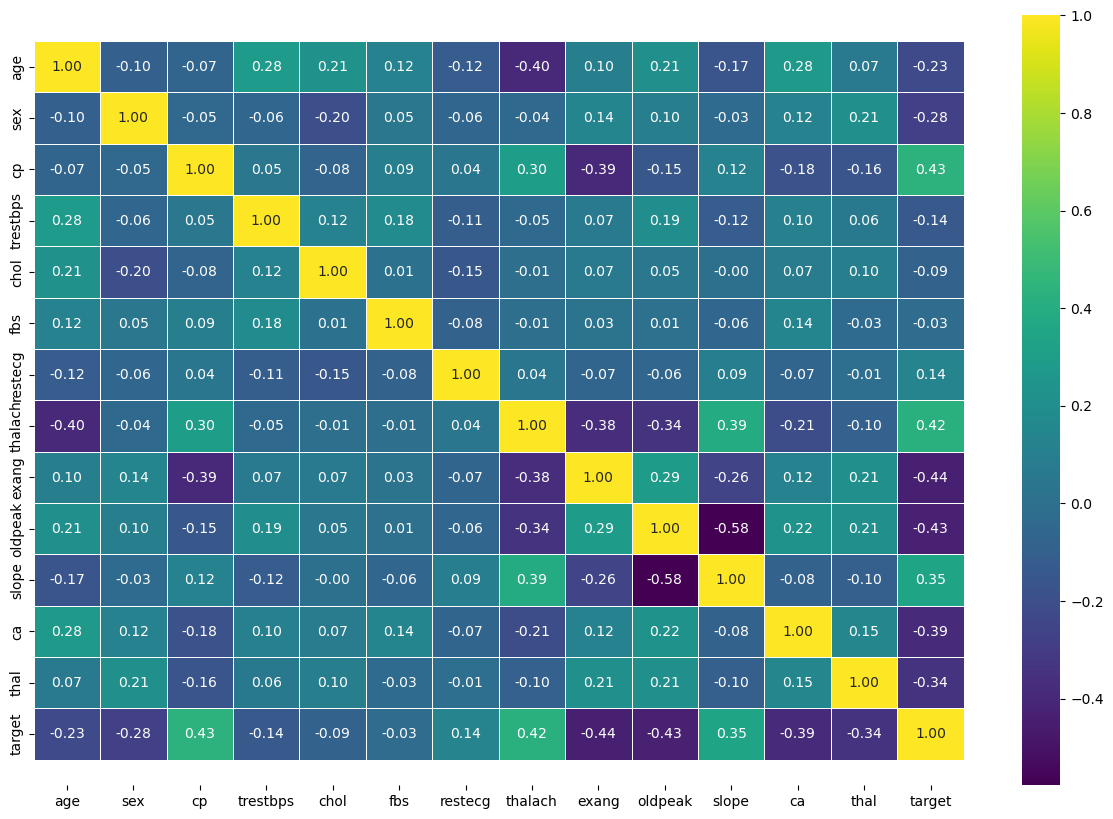

In [21]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="viridis")


bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


##  5. Modelling 

In [22]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into X and y
X=df.drop("target",axis=1)
y=df.target
X.shape,y.shape

((303, 13), (303,))

In [24]:
# split data into train and test sets
np.random.seed(42)
#split into train & test    
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

#### Classification model are use types of model 

1. Logistic Regression

    *  Don’t let the name logistic regression tricks you, it usually falls under the category of the classification algorithm instead of regression algorithm.
   * Then, what is a classification model? Simply put, the prediction generated by a classification model would be a categorical value, e.g. cat or dog, yes or no, true or false … On the contrary, a regression model would predict a continuous numeric value.
   * Logistic regression makes predictions based on the Sigmoid function which is a squiggles-like line as shown below. Despite the fact that it returns the probabilities, the final output would be a label assigned by comparing the probability with a threshold, which makes it eventually a classification algorithm.
   
    *  signoid function $$f(x)=\frac{1}{1+e^-x}\$$

2. Decision Tree -> Random Forest Classifier

    * Decision tree builds tree branches in a hierarchy approach and each branch can be considered as an if-else statement. The branches develop by partitioning the dataset into subsets based on most important features. Final classification happens at the leaves of the decision tree.
    * use Gini , information 


3. Random Forest Classifier 

    *  Compared to decision tree, it has better generalization but less interpretable, because of more layers added to the model.
    * also use Gini, Information 
    * As the name suggest, random forest is a collection of decision trees. It is a common type of ensemble methods which aggregate results from multiple predictors. Random forest additionally utilizes bagging technique that allows each tree trained on a random sampling of original dataset and takes the majority vote from trees.
    
4. Support Vector Machine (SVM)
    
    * Support vector machine finds the best way to classify the data based on the position in relation to a border between positive class and negative class. This border is known as the hyperplane which maximize the distance between data points from different classes. Similar to decision tree and random forest, support vector machine can be used in both classification and regression, SVC (support vector classifier) is for classification problem.
    
5. K-Nearest Neighbour (KNN)
    
    * You can think of k nearest neighbour algorithm as representing each data point in a n dimensional space — which is defined by n features. And it calculates the distance between one point to another, then assign the label of unobserved data based on the labels of nearest observed data points. KNN can also be used for building recommendation system, check out my article on “Collaborative Filtering for Movie Recommendation” if you are interested in this topic.

6. Naive Bayes

    * Naive Bayes is based on Bayes’ Theorem — an approach to calculate conditional probability based on prior knowledge, and the naive assumption that each feature is independent to each other. The biggest advantage of Naive Bayes is that, while most machine learning algorithms rely on large amount of training data, it performs relatively well even when the training data size is small. Gaussian Naive Bayes is a type of Naive Bayes classifier that follows the normal distribution
    
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*tYTrLRcVBBEsCqSUxFDHHA.png" />

### Model Selection Map

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

Now er've got data our data split into training and test sets, it's time to build a machine learning model.

we'll train it  (find the pattern) on the training sets.

And we'll test it ( use the patterns ) on the test set.

We're Goging to try three different machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# import Algorithm from sklearn
# Logistic Regression from linear model
from sklearn.linear_model import LogisticRegression
# K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# put models in a dictionary 
models={"Logistic_Regression":LogisticRegression(),
        "KNeighborsClassifier":KNeighborsClassifier(),
         "RandomForestClassifier":RandomForestClassifier()}


In [29]:
# create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evalutes given machine Learning models.
    Models : a dict of different Scikit-learn machine learning models 
    x_test: testing data 
    x_train : training data 
    y_test: testing data
    y_train : training data
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores={}
    # Loop throgh models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # score and save it Evaluate the model and append its score to model Scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [30]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test)

/home/kali/Desktop/Project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
model_score

{'Logistic_Regression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

# Model Comparison

In [32]:

model_compare=pd.DataFrame(model_score,index=["Accuracy"])

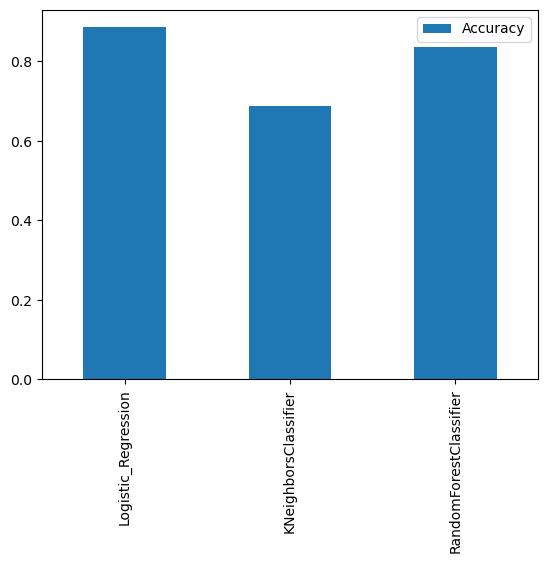

In [33]:
model_compare.T.plot(kind="bar");

Now we've got  a baseline model.... and we know a model's first predictions arem't always what we should bases our next step off. What should do? 

Let's look at  the following :
* Hyperparameter tuning
* Feature importance
* Confusion Matrix 
* cross-Validation
* precision
* recall score
* F1-Score
* Classification report 
* ROC curve
* Area under the curve (AUC)

##  HyperParameter Tuning 

In [34]:
# Let's tune KNN
train_score=[]
test_score=[]
# create a list of different values for n_neighbors
neighbors = range(1,21)
# setup KNN instance 
knn=KNeighborsClassifier()
# Loop throgh different _n_eighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the  algorithm 
    knn.fit(x_train,y_train)
    # updata score in train_score
    train_score.append(knn.score(x_train,y_train))
    # updat score in test score
    test_score.append(knn.score(x_test,y_test))

In [35]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the data: 75.41%


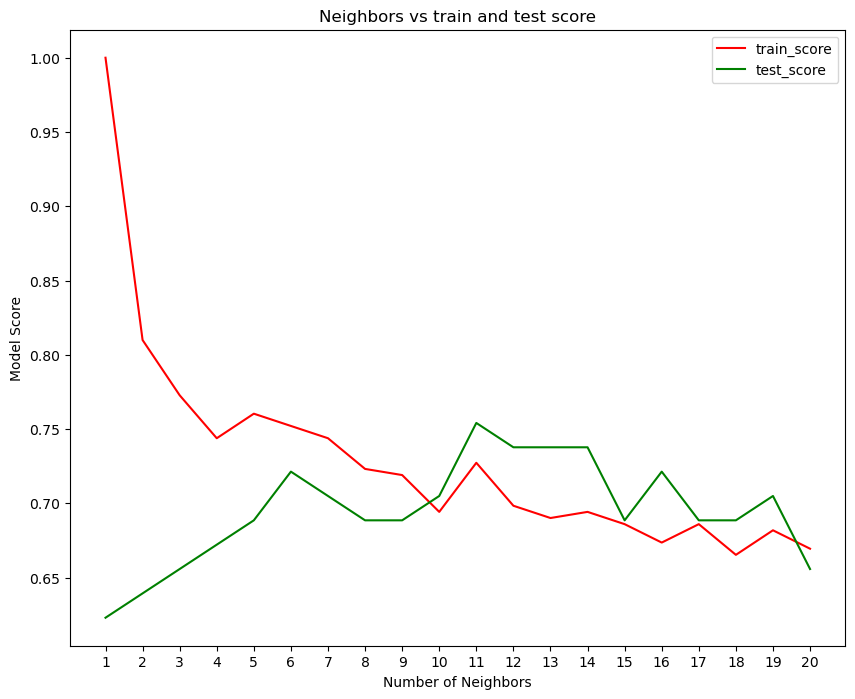

In [37]:
fig,ax=plt.subplots(figsize=(10,8))
# plot the data 
ax.plot(neighbors,train_score,label="train_score",color="red")
ax.plot(neighbors,test_score,label="test_score",color="green")
# customization plot
plt.xticks(np.arange(1,21,1))
ax.set(title="Neighbors vs train and test score",xlabel="Number of Neighbors",ylabel="Model Score")
ax.legend()
ax.plot()
print(f"Maximum KNN Score on the data: {max(test_score)*100:.2f}%")

##  Hyperparameter tuning with RandomizedSearchCV
We 're goning to tune:
* Logitic Regression()
* RamdomForestClassifier()


...using RandomizedSearchCV


In [38]:
# Create  a hyperparameter grid Logistic Regression 
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# creat a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids steup for each of our models, let's tune them using RandomizedSearchCV

In [39]:
# Tune the Logistic Regression 
np.random.seed(42)
# setup random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
# fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tunned LogisticRegression(), Lets's do same for RandomForestClassifier()

In [42]:
np.random.seed(42)
# setup Randomseed

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# FIt random hyperparameter search model for Random ForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [44]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
model_score

{'Logistic_Regression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter turning With GridSearchCV

Since Our LogistivRigression model Provides the best scores so far, we' ll try again using GridSearchCV...

In [52]:
# Differnt hyperparameters for our Logistic Regression model
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# setup grid hyperparameter search for Logistic 
gs_log_reg=GridSearchCV(estimator=LogisticRegression(),
                   param_grid=log_reg_grid,
                   cv=5,
                   verbose=True,
                   refit=True)
# fit the Grid 
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [54]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

##  Evaluting our tuned machine learning classifier , beyond accuracy

* ROC curve and auc score
* Confusion Matrix
* Classification report 
* precision
* recall
* f1-score

.... and it would be great if cross-validation was used where possible


To Make comparisons and evalute our trained model, first we need to  make preddiction


In [55]:
# make prediction with tunned model

y_preds=gs_log_reg.predict(x_test)

In [56]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [57]:
# Import ROC curve already imported 
# Plot ROc curve and calcuate and calculate auc metric
fpr,tpr,threshold=roc_curve(y_test,y_preds)

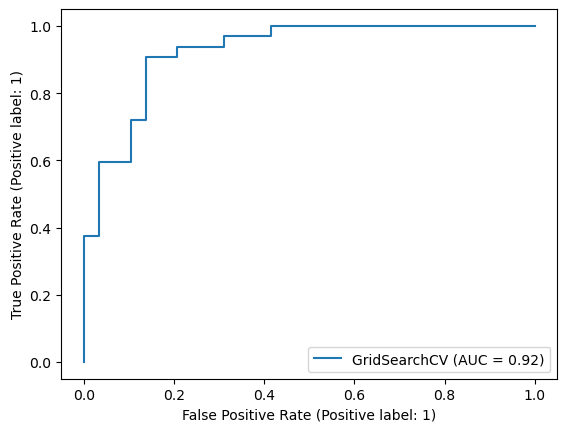

In [65]:
roc_auc = auc(fpr, tpr)
Display_roc=RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)



In [68]:
# confusion matrix 
cm=confusion_matrix(y_test,y_preds)
print(cm)

[[25  4]
 [ 3 29]]


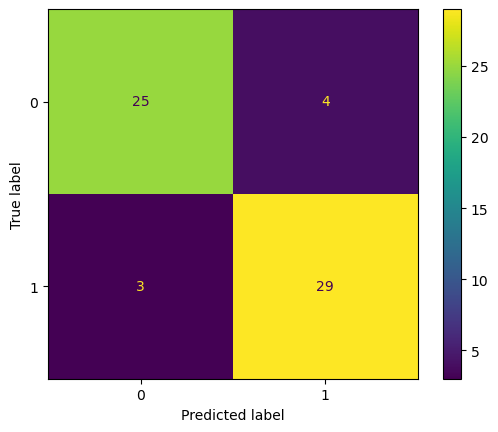

In [71]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs_log_reg.classes_);
disp.plot();

Now we've got a ROC Curve, an AUC metric and a confusion matrix, lets get a classification report as well as cross-validated  precision,recall and f1-score 

In [73]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###  caalculate evaluation metrics using cross validation 

We're going to calculate preciion, recall and f1-score of our model using cross-validation and to do so we'll be using 

`cross_val_Score()`.

In [74]:
# check best hyperparamerters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [75]:
gs_log_reg.best_score_

0.8346088435374149

In [76]:
# create new classifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")



In [81]:
# Cross validate accracy
clf_accur=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
clf_accur

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [85]:
np.mean(clf_accur)

0.8479781420765027

In [82]:
# cross validate precision
clf_pre=cross_val_score(clf,X,y,scoring="precision")
clf_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [86]:
np.mean(clf_pre)

0.8215873015873015

In [84]:
# cross validate   recall
clf_re=cross_val_score(clf,X,y,cv=5,scoring="recall")
clf_re

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [87]:
np.mean(clf_re)

0.9272727272727274

In [88]:
# cross f1 score
clf_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(clf_f1)

0.8705403543192143

In [93]:
cv_metrics=pd.DataFrame(data={"Accuracy":np.mean(clf_accur),
                         "Precision":np.mean(clf_pre),
                         "Recall":np.mean(clf_re),
                         "F1":np.mean(clf_f1)}
                        ,index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


<Axes: title={'center': 'cross-Validated classification Metrics'}>

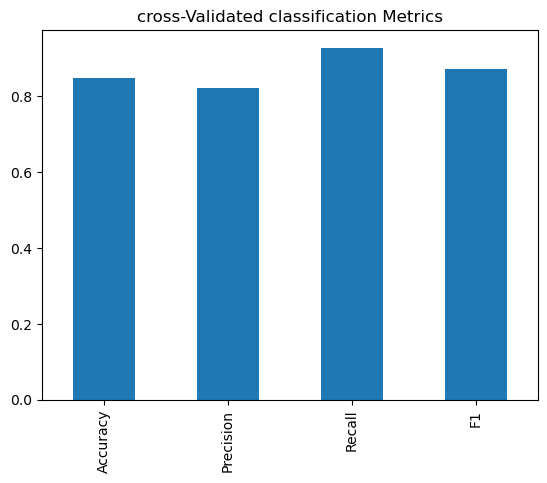

In [96]:
cv_metrics.T.plot.bar(title="cross-Validated classification Metrics",legend=False)

### Feature Impartance

Feature importance is another as asking , "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(Model name ) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [98]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [99]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")

clf.fit(x_train,y_train);

In [100]:
# check coef
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [101]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [107]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

In [108]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])

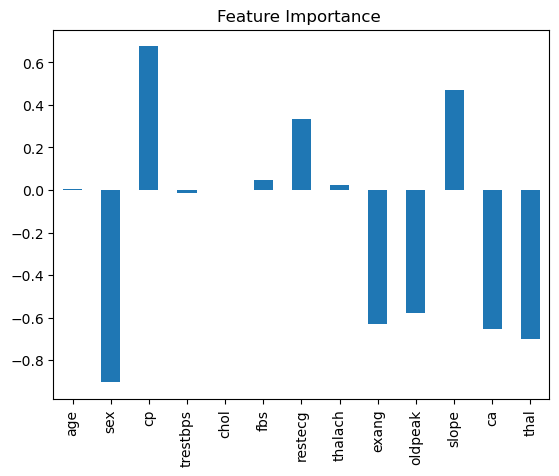

In [110]:
feature_df.T.plot.bar(title="Feature Importance ",legend=None);

In [113]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


slope- the slope of the peak exercise ST segment

    0: Upslping better heart rate with excercise (uncommon>
    1:Flatsloping: minimal change (typical healthy heart )
    2: Downslopins: signs of unhealth heart



In [115]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [114]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


# 6 Experimentation

If you haven't hit your evaluation metric yet .... ask yourself

* could you collect more data?
* could you try a better model? LIke catVoost or XGBoost?
* could you imporove the current models? (beyond what we've done so far)
* If your model is good engough (you have hit your evaluation metric how would you export it and share it with others?
